In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
zomato_data = pd.read_csv("zomato_data.csv")
geo_data = pd.read_csv('Geographical Coordinates.csv')

In [3]:
zomato_data.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [4]:
geo_data.head()

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435


In [5]:
## zomato data


In [6]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   online_order               51717 non-null  object
 1   book_table                 51717 non-null  object
 2   rate                       43942 non-null  object
 3   votes                      51717 non-null  int64 
 4   rest_type                  51490 non-null  object
 5   dish_liked                 23639 non-null  object
 6   cuisines                   51672 non-null  object
 7   approx_costfor_two_people  51371 non-null  object
 8   listed_intype              51717 non-null  object
 9   listed_incity              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [7]:
zomato_data.isnull().sum()

online_order                     0
book_table                       0
rate                          7775
votes                            0
rest_type                      227
dish_liked                   28078
cuisines                        45
approx_costfor_two_people      346
listed_intype                    0
listed_incity                    0
dtype: int64

In [8]:
zomato_data['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [9]:
# remove /5 from rating
zomato_data['rate']=zomato_data['rate'].str.replace("/5",'')
zomato_data['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51712    3.6 
51713     NaN
51714     NaN
51715    4.3 
51716    3.4 
Name: rate, Length: 51717, dtype: object

In [10]:
zomato_data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [11]:
zomato_data['rate']=zomato_data['rate'].replace(['NEW','nan','-'],np.nan)

In [12]:
zomato_data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [13]:
zomato_data['rate']=pd.to_numeric(zomato_data['rate'], errors='coerce')

In [14]:
zomato_data['rate'].isnull().sum()

10052

In [15]:
zomato_data['rate'].fillna(zomato_data['rate'].median(),inplace=True)

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_18360\2503414322.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  zomato_data['rate'].fillna(zomato_data['rate'].median(),inplace=True)


In [16]:
zomato_data['rate'].isnull().sum()

0

In [17]:
zomato_data['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [18]:
## Step 2: Cost Column (approx_costfor_two_people)

In [19]:
zomato_data['approx_costfor_two_people'].isnull().sum()

346

In [20]:
zomato_data['approx_costfor_two_people']=zomato_data['approx_costfor_two_people'].str.replace(',','')

In [21]:
zomato_data['approx_costfor_two_people']=pd.to_numeric(zomato_data['approx_costfor_two_people'],errors='coerce')

In [22]:
zomato_data['approx_costfor_two_people']=zomato_data['approx_costfor_two_people'].fillna(zomato_data['approx_costfor_two_people'].median())

In [23]:
zomato_data['approx_costfor_two_people'].isnull().sum()

0

Step 3: Categorical Columns
dish_liked → Replace NaN with "Not Available"


cuisines → Replace NaN with "Other"


rest_type → Replace NaN with "Unknown"

In [25]:
zomato_data['dish_liked']=zomato_data['dish_liked'].replace(np.nan,'Not Available')

In [26]:
zomato_data['dish_liked'].isnull().sum()

0

In [27]:
zomato_data['cuisines']=zomato_data['cuisines'].replace(np.nan,'Other')
zomato_data['cuisines'].isnull().sum()

0

In [28]:
zomato_data['rest_type']=zomato_data['rest_type'].replace(np.nan,'Unknown')
zomato_data['rest_type'].isnull().sum()

0

Step 4: Votes Column
Fill missing values in votes with medianm

In [30]:
#votes column
zomato_data['votes'].isnull().sum()

0

Step 5: Binary Encoding
Convert the following binary fields:
Column
Mapping
online_order
Yes → 1, No → 0
book_table
Yes → 1, No → 0



In [32]:
zomato_data['online_order'].isnull().sum()

0

In [33]:
zomato_data['online_order']=np.where(zomato_data['online_order']=='Yes',1,0)

In [34]:
zomato_data['online_order']

0        1
1        1
2        1
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    0
51716    0
Name: online_order, Length: 51717, dtype: int32

In [35]:
zomato_data['book_table']=np.where(zomato_data['book_table']=='Yes',1,0)

In [36]:
zomato_data['book_table']

0        1
1        0
2        0
3        0
4        0
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: book_table, Length: 51717, dtype: int32

Step 6: Data Type Conversion
Ensure the following conversions:
rate → float


votes → integer


approx_costfor_two_people → integer

In [38]:
zomato_data['rate'].dtype

dtype('float64')

In [39]:
zomato_data['votes'].dtype

dtype('int64')

In [40]:
zomato_data['approx_costfor_two_people'].dtype

dtype('float64')

In [41]:
zomato_data['approx_costfor_two_people']=zomato_data['approx_costfor_two_people'].astype(int)

In [42]:
zomato_data['approx_costfor_two_people'].dtype

dtype('int32')

In [43]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int32  
 1   book_table                 51717 non-null  int32  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 3.4+ MB


In [44]:
zomato_data.describe()

,online_order,book_table,rate,votes,approx_costfor_two_people
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,0.588665,0.124698,3.700362,283.697527,554.391689
std,0.492080,0.330379,0.395391,803.838853,437.563723
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.500000,7.000000,300.000000
50%,1.000000,0.000000,3.700000,41.000000,400.000000
75%,1.000000,0.000000,3.900000,198.000000,650.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


In [483]:
#eda

In [485]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int32  
 1   book_table                 51717 non-null  int32  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(3), int64(1), object(5)
memory usage: 3.4+ MB


In [487]:
zomato_data.head()

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [489]:
zomato_data['online_order'].value_counts()

online_order
1    30444
0    21273
Name: count, dtype: int64

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_18360\1397992395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=zomato_data,palette='coolwarm')


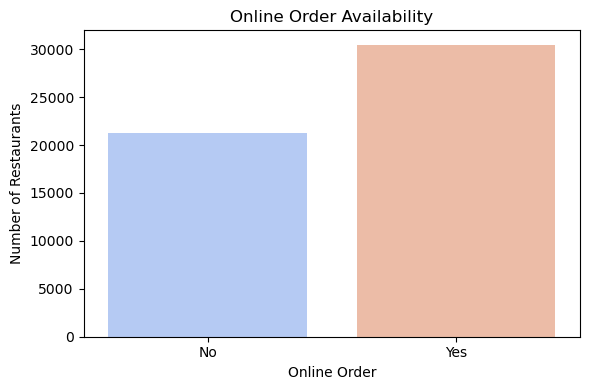

In [555]:
plt.figure(figsize=(6, 4))
sns.countplot(x='online_order', data=zomato_data,palette='coolwarm')
plt.title('Online Order Availability')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Online Order")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

Insights:
- most of the restaurants coming online for their service using zomato
- it make digital convinence for the people and restaurants

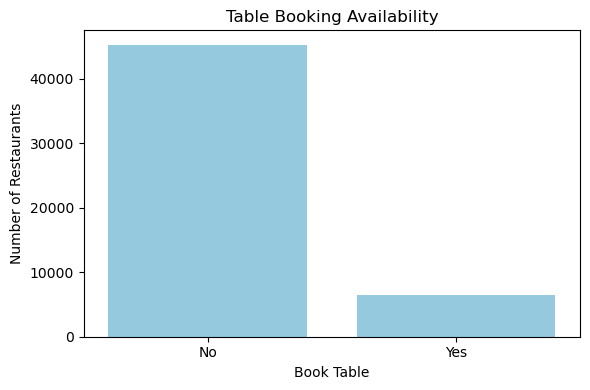

In [565]:
plt.figure(figsize=(6, 4))
sns.countplot(x='book_table', data=zomato_data,color='skyblue')
plt.title('Table Booking Availability')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Book Table")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

Insights:
- most of the restaurants are not prefered table booking
- very less restaurant consider for table booking

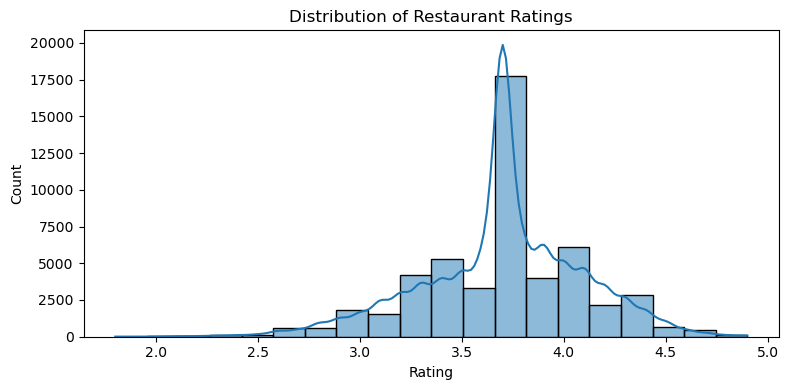

In [570]:
plt.figure(figsize=(8, 4))
sns.histplot(zomato_data['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insights:
- most of the average rating for the restaurants is between 3.5 to 4
- fewer restaurants pass the 4.0 rating as they are luxary restaurant giving quality products

C:\Users\SHIVAM\AppData\Local\Temp\ipykernel_18360\3054699096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rest_types.values, y=top_rest_types.index, palette="viridis")


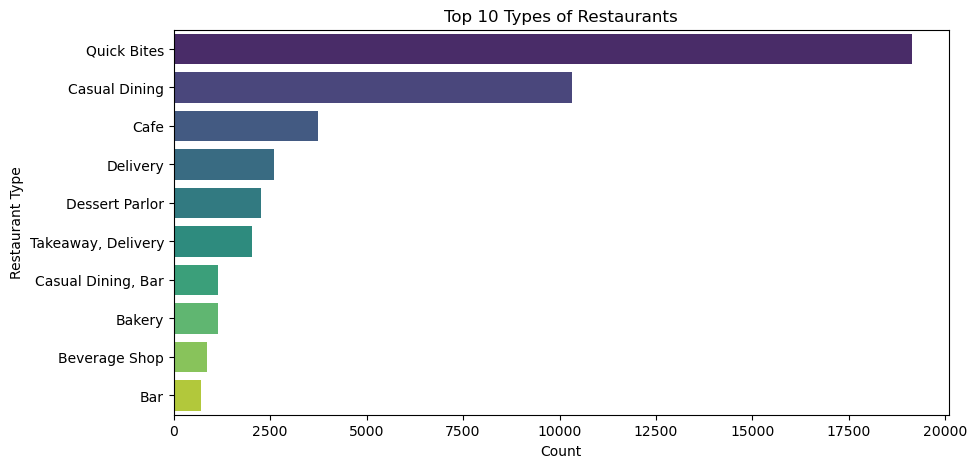

In [577]:
plt.figure(figsize=(10, 5))
top_rest_types = zomato_data['rest_type'].value_counts().nlargest(10)
sns.barplot(x=top_rest_types.values, y=top_rest_types.index, palette="viridis")
plt.title('Top 10 Types of Restaurants')
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.show()

Insights:
- quick bites and casual dinning are most comman restaurant types.

In [45]:
# zomato_data.to_csv('cleaned_zomato_data.csv',index=False)

In [46]:
# eda

In [47]:
zomato_data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'approx_costfor_two_people', 'listed_intype',
       'listed_incity'],
      dtype='object')

## mcq

In [96]:
#  What is the shape of the given dataset?

In [98]:
zomato_data.shape

(51717, 10)

In [100]:
# 2. How many restaurants serve North Indian cuisine?

In [102]:
len(zomato_data.loc[zomato_data['cuisines'].str.contains('North Indian')])

21085

In [104]:
# 3. What cuisine is most commonly offered by restaurants in Bangalore?


In [108]:
zomato_data['cuisines'].value_counts().head(1)

cuisines
North Indian    2913
Name: count, dtype: int64

In [110]:
# . Which locality in Bangalore has the highest average cost for dining (for two people)?

In [114]:
zomato_data.groupby('listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False).head(1)

listed_incity
Church Street    770.361248
Name: approx_costfor_two_people, dtype: float64

In [116]:
# 5. Which restaurant type has the top rating with over 1000 votes?

In [162]:
zomato_data[zomato_data['votes']>1000].sort_values('rate',ascending=False)['rest_type'].head(1)

11504    Casual Dining, Bar
Name: rest_type, dtype: object

In [164]:
# 6. How much does it cost at minimum to eat out in Bangalore?

In [178]:
zomato_data[zomato_data['rest_type']=='Casual Dining']['approx_costfor_two_people'].min()

200

In [180]:
# 7. What percentage of total online orders is received by restaurants in Banashankari?

In [218]:
len(zomato_data[(zomato_data['listed_incity']=='Banashankari')&(zomato_data['online_order']==1)])

546

In [234]:
len(zomato_data[zomato_data['listed_incity']=='Banashankari']['online_order'])

863

In [238]:
546/863

0.6326767091541136

In [240]:
## 8. Which locality has the most restaurants with over 500 votes and a rating below 3.0?

In [274]:
zomato_data[(zomato_data['votes']>500) & (zomato_data['rate']<3.0)].groupby('listed_incity').size().sort_values(ascending=False).head(1)

listed_incity
Brookefield    8
dtype: int64

In [276]:
## 9. Which locality in Bangalore should Zomato target for expansion based on restaurant type diversity?

In [308]:
zomato_data.groupby('listed_incity')['rest_type'].value_counts().head(1)

listed_incity  rest_type  
BTM            Quick Bites    1305
Name: count, dtype: int64

In [310]:
## 10. What's the average cost difference between buffet and delivery restaurants?

In [333]:
avg_buffet=zomato_data[zomato_data['listed_intype']=='Buffet']['approx_costfor_two_people'].mean()

In [335]:
avg_delivery=zomato_data[zomato_data['listed_intype']=='Delivery']['approx_costfor_two_people'].mean()

In [339]:
avg_buffet-avg_delivery

831.2513659898209

In [341]:
## 11 . What is the maximum number of votes received by any restaurant with online ordering?

In [355]:
zomato_data[(zomato_data['votes']==zomato_data['votes'].max()) & (zomato_data['online_order']==1)]['votes']

49170    16832
49627    16832
50059    16832
Name: votes, dtype: int64

In [357]:
## 12. What is the average rating of restaurants that serve both North Indian and Chinese cuisines?

In [369]:
zomato_data[(zomato_data['cuisines'].str.contains('Indian')) & (zomato_data['cuisines'].str.contains('Chinese'))]['rate'].mean()

3.591952011997001

In [371]:
## 13. What is the most profitable area for Zomato based on potential revenue estimation?

In [377]:
zomato_data.groupby('listed_incity')['approx_costfor_two_people'].max().sort_values(ascending=False)

listed_incity
Indiranagar              6000
Old Airport Road         6000
Malleshwaram             5000
Marathahalli             4500
Lavelle Road             4100
Residency Road           4000
Brigade Road             4000
MG Road                  4000
Church Street            4000
Whitefield               3000
Koramangala 4th Block    3000
Frazer Town              3000
Electronic City          3000
Brookefield              3000
Rajajinagar              2600
Koramangala 6th Block    2500
Sarjapur Road            2500
Koramangala 7th Block    2500
BTM                      2500
Koramangala 5th Block    2500
Bellandur                2500
Basavanagudi             2200
New BEL Road             2000
HSR                      2000
Kammanahalli             2000
Kalyan Nagar             1800
Jayanagar                1700
JP Nagar                 1700
Bannerghatta Road        1700
Banashankari             1500
Name: approx_costfor_two_people, dtype: int32

In [379]:
## 14. If Zomato wants to reduce customer complaints, which restaurant type should they focus on?

In [432]:
zomato_data.groupby(['rest_type'])['rate'].max().sort_values(ascending=False)

rest_type
Casual Dining, Bar           4.9
Casual Dining                4.9
Dessert Parlor               4.9
Microbrewery                 4.9
Bakery                       4.8
                            ... 
Food Court, Casual Dining    3.4
Bhojanalya                   3.3
Quick Bites, Kiosk           3.3
Bakery, Food Court           3.2
Dessert Parlor, Kiosk        3.1
Name: rate, Length: 94, dtype: float64

In [445]:
## 15. In which area should Zomato invest by considering high rating (rate > 4.2), high number of votes (> 500) and including online orders?

In [481]:
zomato_data[(zomato_data['rate']>4.2) & (zomato_data['votes']>500) & (zomato_data['online_order']==1)].groupby('listed_incity')['online_order'].value_counts().sort_values(ascending=False).head(1)

listed_incity  online_order
MG Road        1               97
Name: count, dtype: int64